In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# df.info()
df.shape

(301, 9)

# Preprocessing

In [5]:
for col in df.columns.values:
    print('number uniques values of {} : {}'.format(col,df[col].nunique() ))

number uniques values of Car_Name : 98
number uniques values of Year : 16
number uniques values of Selling_Price : 156
number uniques values of Present_Price : 147
number uniques values of Kms_Driven : 206
number uniques values of Fuel_Type : 3
number uniques values of Seller_Type : 2
number uniques values of Transmission : 2
number uniques values of Owner : 3


In [6]:
#categorical feature seller type transmission, owner
for col in ['Seller_Type','Fuel_Type','Transmission','Owner']:
    print(df[col].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [7]:
df.isnull().sum()
#no missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final = df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [11]:
final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
#deriving new feature, for the model to accurate predict current year is 2020 and creating new feature
#so how old is the car
final['current_year'] = 2021

In [13]:
final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [14]:
final['no_year'] = final['current_year'] - final['Year']

In [15]:
final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [16]:
final.drop(['Year'],axis=1, inplace=True)
#current year is not required because it is hardcoded value
final.drop(['current_year'],axis=1, inplace=True)

In [17]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Text(0.5, 1.0, 'selling price')

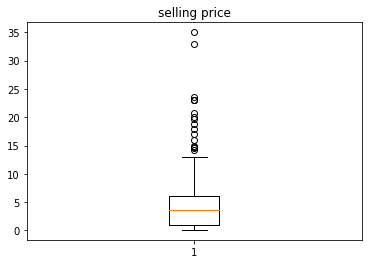

In [18]:
plt.boxplot(final['Selling_Price'])
plt.title("selling price")

In [19]:
Q1 = np.percentile(final['Selling_Price'],25,interpolation = 'midpoint') 
Q2 = np.percentile(final['Selling_Price'],50,interpolation = 'midpoint')
Q3 = np.percentile(final['Selling_Price'],75,interpolation = 'midpoint')
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR

outlier = []
for x in final['Selling_Price']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[14.9,
 23.0,
 18.0,
 16.0,
 19.99,
 18.75,
 23.5,
 33.0,
 19.75,
 14.25,
 14.5,
 14.73,
 23.0,
 35.0,
 23.0,
 20.75,
 17.0]

In [20]:
ind1 = final["Selling_Price"]>up_lim
df.loc[ind1].index

Int64Index([50, 51, 52, 53, 59, 62, 63, 64, 66, 69, 79, 80, 82, 86, 93, 96,
            97],
           dtype='int64')

In [21]:
ind1 = final["Selling_Price"]<low_lim
df.loc[ind1].index

Int64Index([], dtype='int64')

In [22]:
final.drop([50, 51, 52, 53, 59, 62, 63, 64, 66, 69, 79, 80, 82, 86, 93, 96,
            97], inplace = True)


Text(0.5, 1.0, 'box Plot of  Sp')

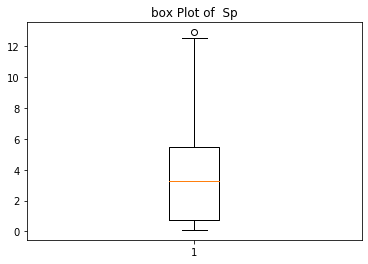

In [23]:
plt.boxplot(final['Selling_Price'])
plt.title('box Plot of  Sp')

### convert category feature to some other values
#### first column to prevent dummy variable trap, three cat then represented in one hot encoded it will presented as 100, 010,001, so you  have to get_dummies before one hot encoding

In [24]:
#categorical to some other value
final = pd.get_dummies(final, drop_first=True)

In [25]:


final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


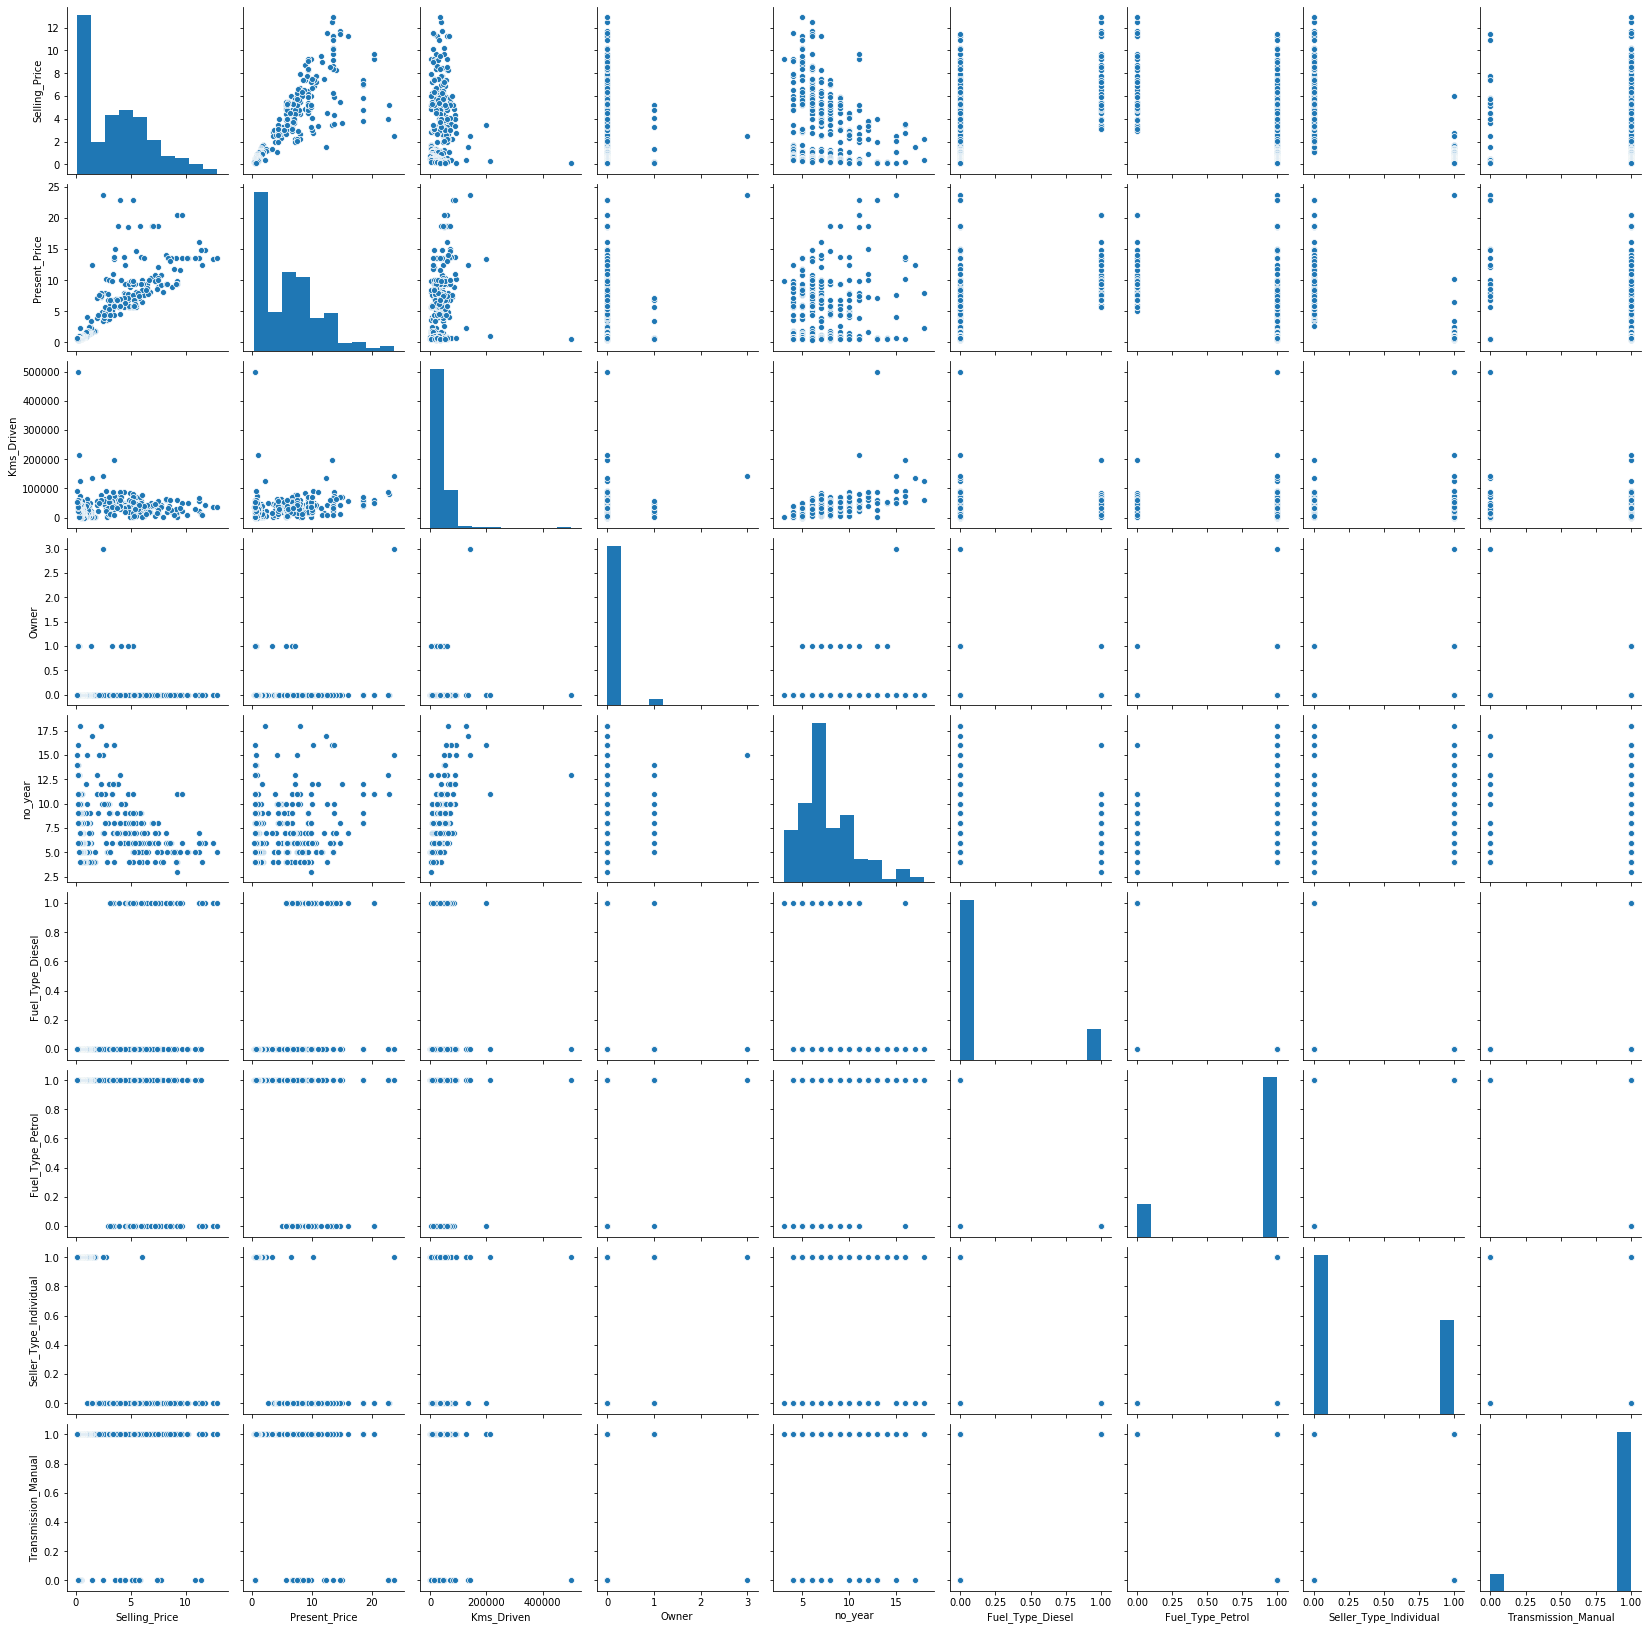

In [26]:
sns.pairplot(data=final, kind='scatter')

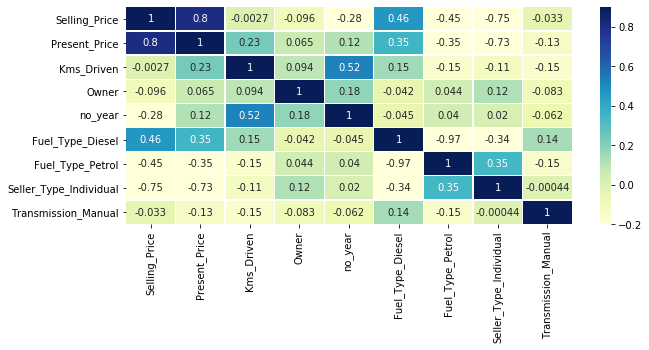

In [27]:
corr=final.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr,vmin=-.2,vmax=.9,annot=True,linewidths=0.2,cmap = 'YlGnBu')

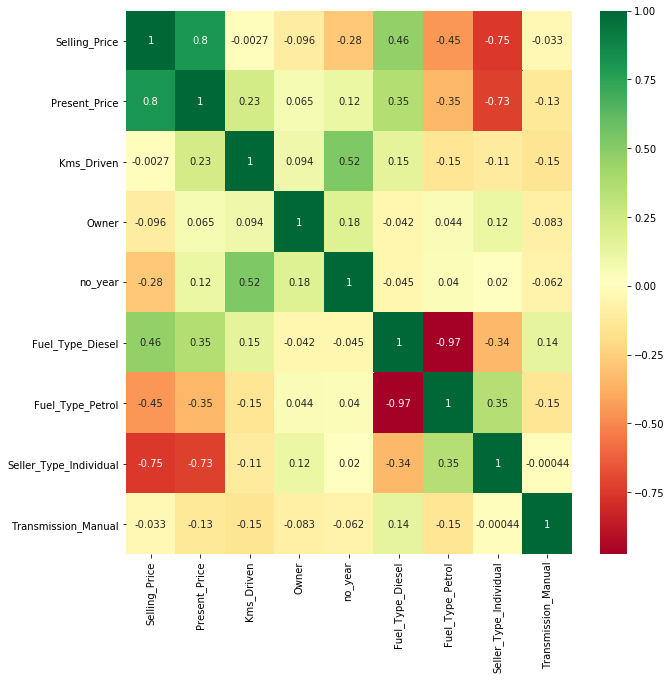

In [28]:
#get correlations of each features in dataset
corr = final.corr()
top_corr = corr.index
plt.figure(figsize=(10,10))
#plotmap
sns.heatmap(final[top_corr].corr(), annot = True, cmap = "RdYlGn")

In [29]:
#fueltype petrol and fuel type diesel are negatively correlated, less number of feature corre is less than -0.8 hihgre that 0.8

In [30]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [31]:
x = final.iloc[:,1:] #independant
y = final.iloc[:,0] #dependant

In [32]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [33]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### feature importance



In [34]:
#oredering of the importance
from sklearn.ensemble import ExtraTreesRegressor
model =  ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [35]:
print(model.feature_importances_)

[0.31137635 0.03496531 0.00103819 0.12818895 0.03111844 0.00612266
 0.48233347 0.00485664]


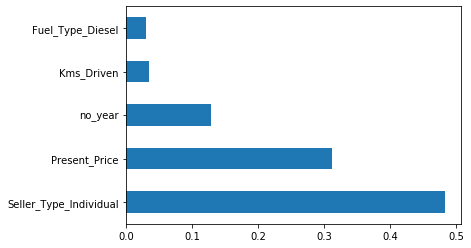

In [36]:
#plot graph of feature importance for better visualization
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

### train_test_split

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=42 ,test_size=0.2)

In [38]:
 x_train.shape


(227, 8)

In [39]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# model building

### hyper parameter tuning

In [40]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor()

In [41]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [42]:
 #Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
    
    
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [43]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [45]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [46]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [47]:
#model created

In [48]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [49]:
predictions = rf_random.predict(x_test)
predictions

array([ 7.36851185,  3.65199006,  0.32596657,  4.93278644,  4.17303657,
        5.98197367,  5.14171164,  0.2680396 ,  2.70486167,  4.38734469,
        2.84613435,  8.82088368,  0.46539336,  0.36917066,  7.82470949,
        5.08713743,  7.48906265,  0.60767483,  0.44016768,  6.14483719,
        0.726475  ,  4.22879361,  4.93466855,  7.89542801,  5.53836053,
        1.31643472,  7.03681021,  7.42180925, 10.08241294,  1.03190092,
        4.77939472,  0.3288753 ,  0.25302065,  6.6486079 ,  4.16026114,
        2.83870928,  6.12745772,  5.49961643,  0.19973377,  2.57183034,
        3.72971465,  3.05071671,  2.60530188,  0.64637418,  6.00112571,
        5.02782163,  4.82056249,  4.61883707,  1.04053354,  2.82949932,
        7.42180925,  0.22278379,  1.20338121,  6.78847346,  0.64506774,
        3.08891239,  9.3879816 ])

In [50]:
#check how well model is performing
#print('accuracy of random forest regressor:',rf_random.score(x_test,y_test))

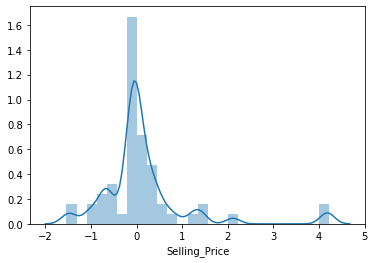

In [51]:
sns.distplot(y_test-predictions)

#### graph look like normal distr, the model we have created is giving us a good result ,because it form a norm distributionit should be minimal so we are getting gausion distribution garaph

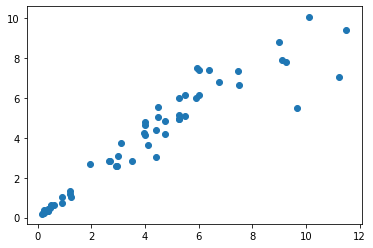

In [52]:
plt.scatter(y_test,predictions)
#the plot is linearly available enlined in a line so this model is good

In [58]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5495652520560966
MSE: 1.0025592802014778
RMSE: 1.001278822407364


In [59]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)



In [ ]:
df.h

# new random forest regression

In [54]:
#RANDOM FOREST REGRESSION
#create instance of random forest
rf_reg=RandomForestRegressor()
#Hyperparameters:
# Number of trees to try 
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200,1300]
#max features to consider 
max_features = ['auto', 'sqrt']
# Maximum number of depth in trees
max_depth = [5, 10, 15, 20, 25, 30,35]
#min samples for splitting nodes
min_samples_split = [5, 10, 15, 20,25,60,100]
# Min samples for each leaf 
min_samples_leaf = [1, 2, 3,5, 12]



#random_grid for hyperparameter tuning
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [55]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35],
 'min_samples_split': [5, 10, 15, 20, 25, 60, 100],
 'min_samples_leaf': [1, 2, 3, 5, 12]}

In [56]:
#search for optimal parameters using cv=6
rf_regr = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 12, cv = 6, verbose=2, random_state=4, n_jobs = 1)


In [57]:
#fit the train data
rf_regr.fit(x_train_scaled,y_train)

Fitting 6 folds for each of 12 candidates, totalling 72 fits
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=25, min_samples_leaf=3, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=12, max_features=sqrt, max_depth=25 


KeyboardInterrupt: 

In [ ]:
#predict the selling price in the test data
prediction=rf_regr.predict(x_test_scaled)

In [ ]:
#check how well model is performing
print('accuracy of random forest regressor:',rf_regr.score(x_test_scaled,y_test))

In [ ]:
sns.distplot(y_test-prediction)

In [ ]:
plt.scatter(y_test,prediction)
#the plot is linearly available enlined in a line so this model is good

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# lasso regression

In [ ]:
#Feature Scaling
scaler=StandardScaler()
scaler.fit(x_train)

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#MODEL TRAINING
#LASSO REGRESSION
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from numpy import arange
reg = Lasso()
#model evaluation
cv = RepeatedKFold(n_splits=11, n_repeats=4, random_state=20)
#Gridsearch for model tuning
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
find_params = GridSearchCV(reg, grid, cv=cv, n_jobs=1)
#fit it to our data for it the learn the best parameters 
lasso_model = find_params.fit(x_train_scaled,y_train)

In [ ]:
#making predictions
lasso_pred =lasso_model.predict(x_test_scaled)
print('accuracy of lasso_regression:',lasso_model.score(x_test_scaled,y_test))

In [ ]:
sns.distplot(y_test-lasso_pred)

# KNN REGRESSION

In [ ]:
#KNN REGRESSION
#knn instance
from sklearn.neighbors import KNeighborsRegressor
knn_set = KNeighborsRegressor()

In [ ]:
#hyperparameters
leaf_size = list(range(1,11))
n_neighbors = list(range(1,11))
p=[1,2]
#setting hyperparameters as dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Use GridSearch
knn_grid = GridSearchCV(knn_set, hyperparameters, cv=10)

In [ ]:
#Fit the model
knn_reg = knn_grid.fit(x_train_scaled,y_train)
pred_knn=knn_reg.predict(x_test_scaled)

In [ ]:
print('knn regression accuracy is:',knn_reg.score(x_test_scaled,y_test)) 

In [ ]:
knn_predict=knn_reg.predict(x_test_scaled)
plt.scatter(y_test,knn_predict)
#the plot is linearly available enlined in a line so this model is good

In [ ]:
sns.distplot(y_test-knn_predict)

# model comaprison

In [ ]:

print('accuracy of random forest regressor:',rf_regr.score(x_test_scaled,y_test))
print('knn regression accuracy is:',knn_reg.score(x_test_scaled,y_test)) 
print('accuracy of lasso_regression:',lasso_model.score(x_test_scaled,y_test))

In [ ]:
#knn has higher accuracy

### pickling 

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('knn_model.pkl', 'wb')

# dump information to that file
pickle.dump(knn_reg, file)

In [ ]:
%%html
<iframe src="https://carprice369.herokuapp.com" width="1200" height="1000"></iframe>